In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import time
from subprocess import check_output

In [3]:
data = pd.read_csv('/Users/sq3508nw/Desktop/WorldBank/WA_Fn-UseC_-Telco-Customer-Churn1.csv')

In [4]:
data['TotalCharges']=data['TotalCharges'].fillna(data['TotalCharges'].mean())

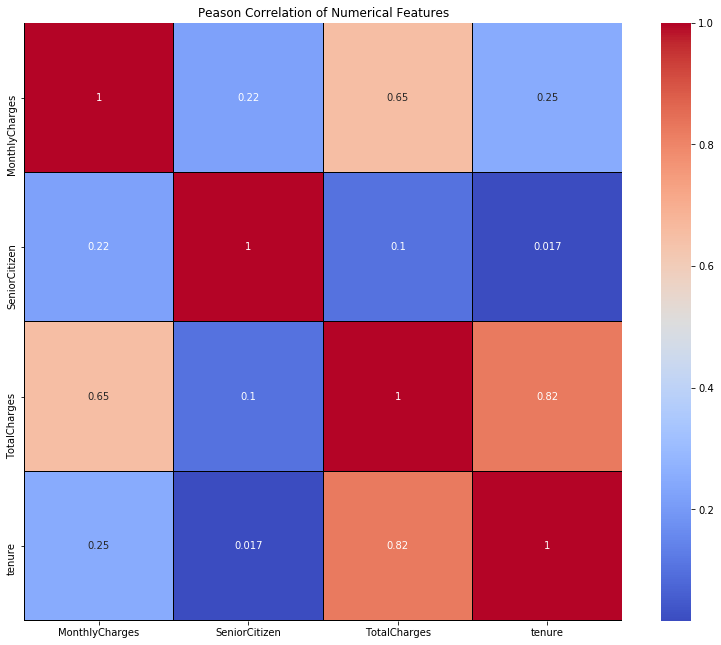

In [5]:
str_list = [] 
for colname, colvalue in data.iteritems():
    if type(colvalue[2]) == str:
        str_list.append(colname)
        

num_list = data.columns.difference(str_list)


data_num=  data[num_list]
f, ax = plt.subplots(figsize = (14, 11))
plt.title('Peason Correlation of Numerical Features')

# Ploting a heat map using seaborn
sns.heatmap(data_num.astype(float).corr(), linewidths = 0.25, vmax =1.0,
           square = True, cmap = 'coolwarm', linecolor = 'k', annot = True)
plt.show()

In [6]:
data['gender'] = data['gender'].apply(lambda Gender:1 if Gender=='Male' else 0)
data['Partner'] = data['Partner'].apply(lambda Partner:1 if Partner=='Yes' else 0)
data['Dependents'] = data['Dependents'].apply(lambda Dependent:1 if Dependent=='Yes' else 0)
data['PhoneService'] = data['PhoneService'].apply(lambda PhoneService:1 if PhoneService=='Yes' else 0)
data['PaperlessBilling'] = data['PaperlessBilling'].apply(lambda PaperlessBilling:1 if PaperlessBilling=='Yes' else 0)

In [7]:
col = data.columns       # .columns gives columns names in data 
print(col)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [8]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,Yes


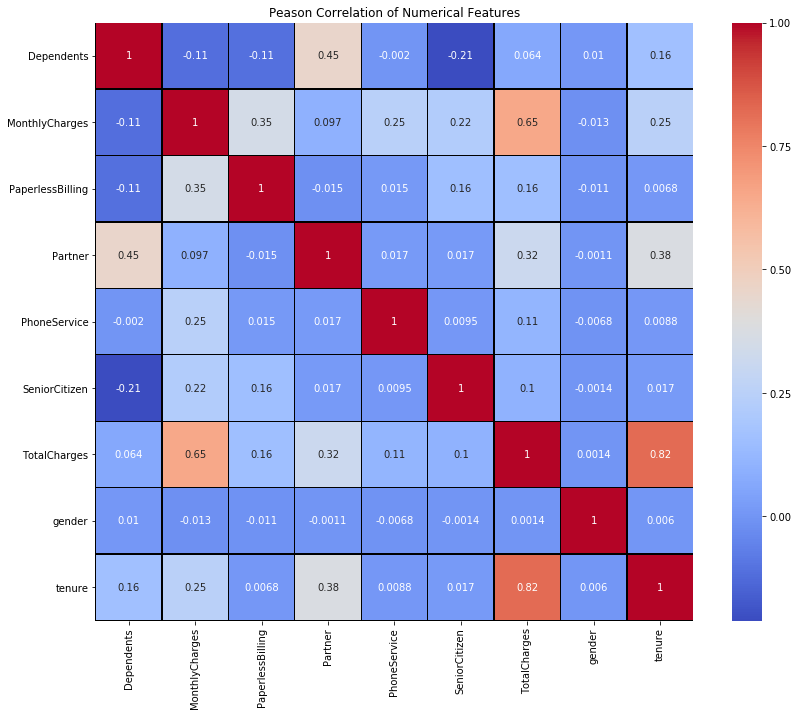

In [9]:
str_list = [] 
for colname, colvalue in data.iteritems():
    if type(colvalue[2]) == str:
        str_list.append(colname)
        

num_list = data.columns.difference(str_list)


data_num=  data[num_list]
f, ax = plt.subplots(figsize = (14, 11))
plt.title('Peason Correlation of Numerical Features')

# Ploting a heat map using seaborn
sns.heatmap(data_num.astype(float).corr(), linewidths = 0.25, vmax =1.0,
           square = True, cmap = 'coolwarm', linecolor = 'k', annot = True)
plt.show()

In [10]:
print(data.shape)
data = pd.get_dummies(data = data, columns = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','StreamingMovies','Contract','PaymentMethod'])
print(data.shape)
data.head()

(7018, 21)
(7018, 45)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,1,0,0,1,0,0,0,0,1,0


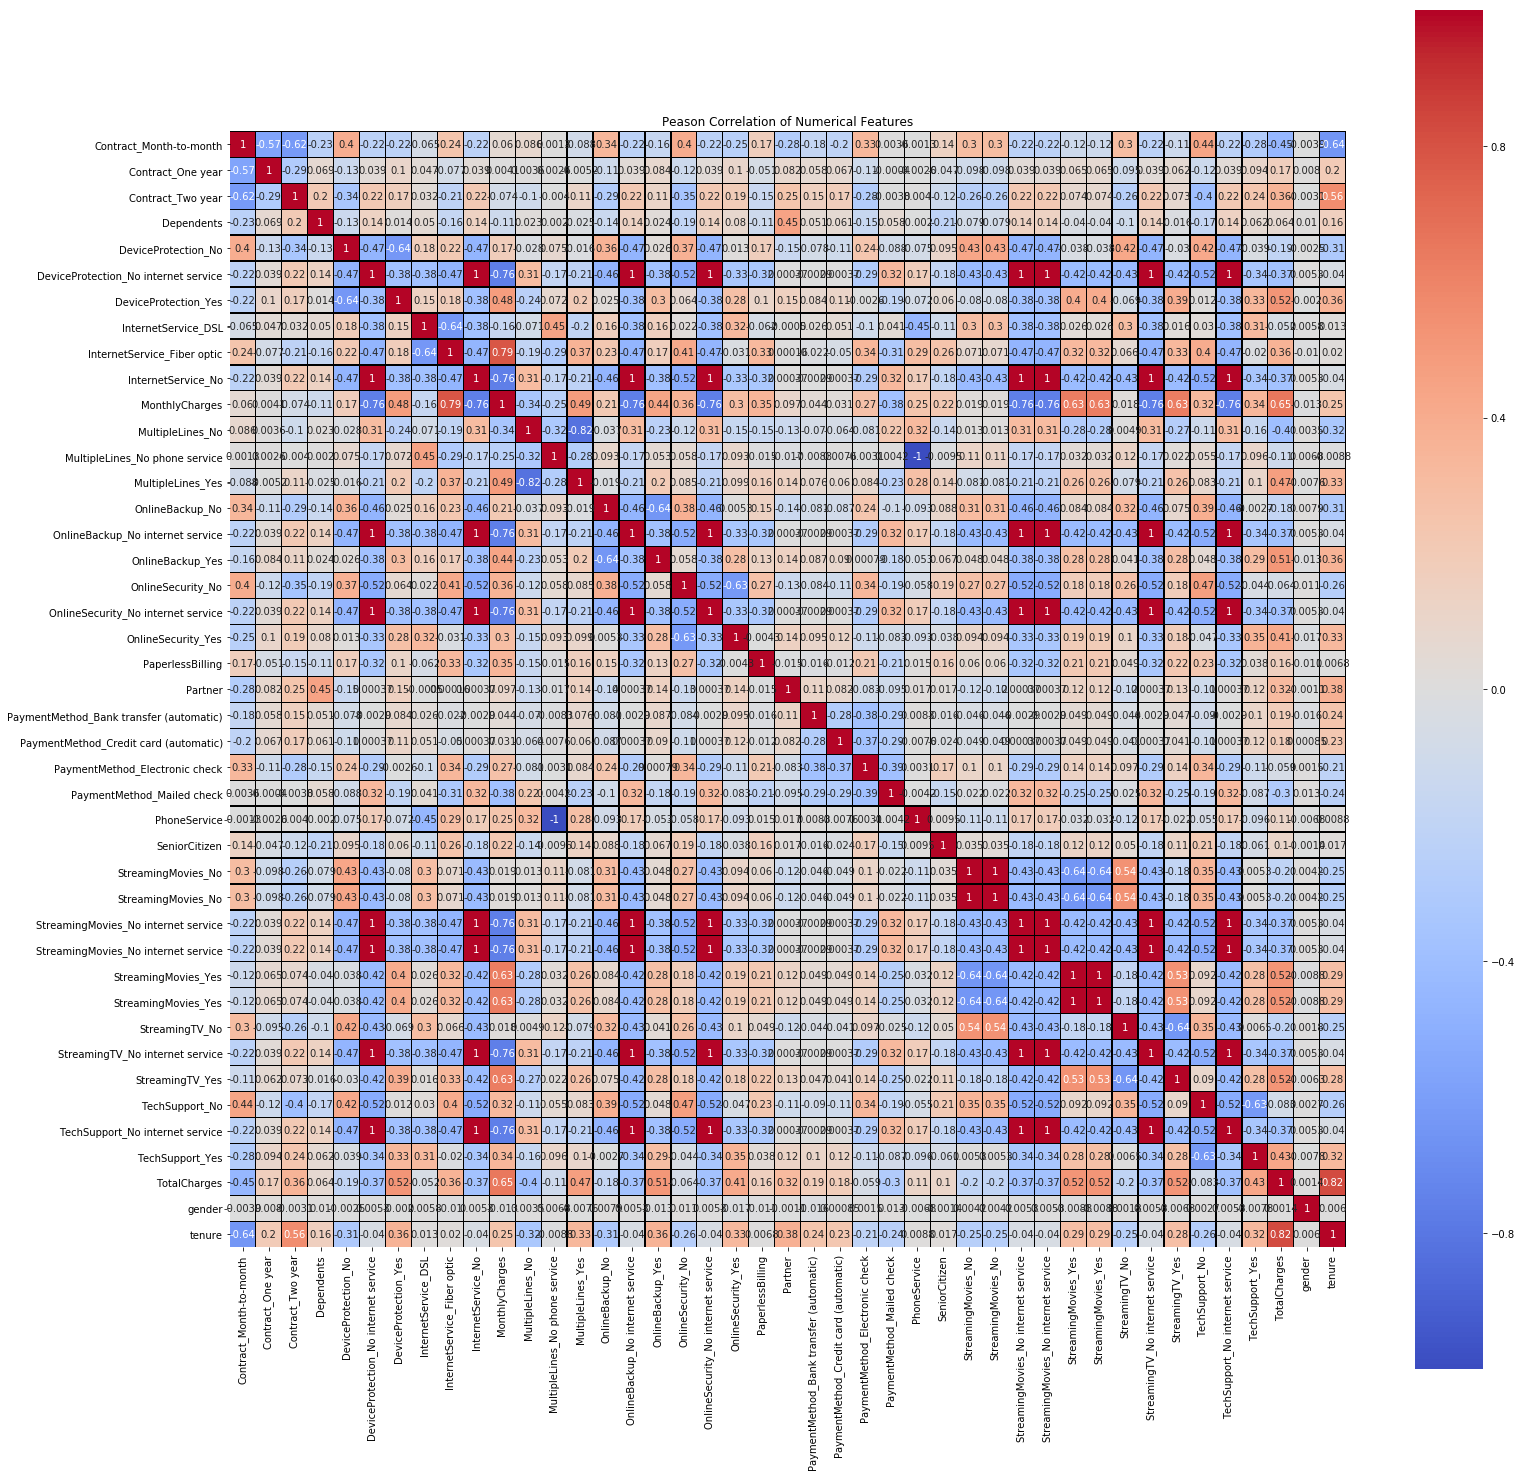

In [12]:
str_list = [] 
for colname, colvalue in data.iteritems():
    if type(colvalue[2]) == str:
        str_list.append(colname)
        

num_list = data.columns.difference(str_list)


data_num=  data[num_list]
f, ax = plt.subplots(figsize = (25,25))
plt.title('Peason Correlation of Numerical Features')

# Ploting a heat map using seaborn
sns.heatmap(data_num.astype(float).corr(), linewidths = 0.25, vmax =1.0,
           square = True, cmap = 'coolwarm', linecolor = 'k', annot = True)
plt.show()

In [25]:
data.columns
'DeviceProtection_No internet service', 'StreamingMovies_No internet service', 'OnlineSecurity_No internet service','OnlineBackup_No internet service','TechSupport_No internet service','StreamingMovies_No internet service

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'StreamingMovies_No',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'C

In [13]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7018.000000,7018.000000,7018.000000,7018.000000,7018.000000,7018.000000,7018.000000,7018.000000,7018.000000,7018.000000,...,7018.000000,7018.000000,7018.000000,7018.000000,7018.000000,7018.000000,7018.000000,7018.000000,7018.000000,7018.000000
mean,0.505130,0.162439,0.482901,0.299088,32.357937,0.903249,0.592761,64.753691,2282.838112,0.481476,...,0.395127,0.217013,0.387860,0.550299,0.208891,0.240809,0.219578,0.215731,0.335851,0.228840
std,0.500009,0.368880,0.499743,0.457891,24.548367,0.295640,0.491355,30.102518,2264.900219,0.499692,...,0.488913,0.412241,0.487297,0.497499,0.406546,0.427605,0.413990,0.411358,0.472321,0.420116
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.462500,401.587500,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1400.425000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3783.600000,1.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'StreamingMovies_No',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_Month-to-month', 

In [15]:
y = data.Churn                         # 1 or 0
list = ['customerID','Churn']
x = data.drop(list,axis = 1 )
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


Number of Yes:  5157
Number of No :  1861


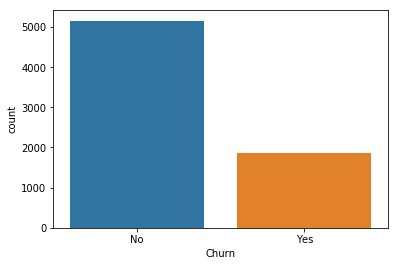

In [18]:
ax = sns.countplot(y,label="Count")       # NO =  1861, YES = 5157
Yes, No = y.value_counts()
print('Number of Yes: ',Yes)
print('Number of No : ',No)

In [21]:
x.describe()
x.shape

(7018, 43)

In [22]:
y.shape

(7018,)

In [36]:
drop_list1 = ['DeviceProtection_No internet service', 'StreamingMovies_No internet service', 'OnlineSecurity_No internet service','OnlineBackup_No internet service','TechSupport_No internet service','StreamingMovies_No internet service','StreamingTV_No internet service', 'StreamingMovies_No','StreamingMovies_Yes']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,1,...,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,1,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,1,0,1,0,0,0,0,1,0


In [37]:
x_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,1,...,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,1,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,1,0,1,0,0,0,0,1,0


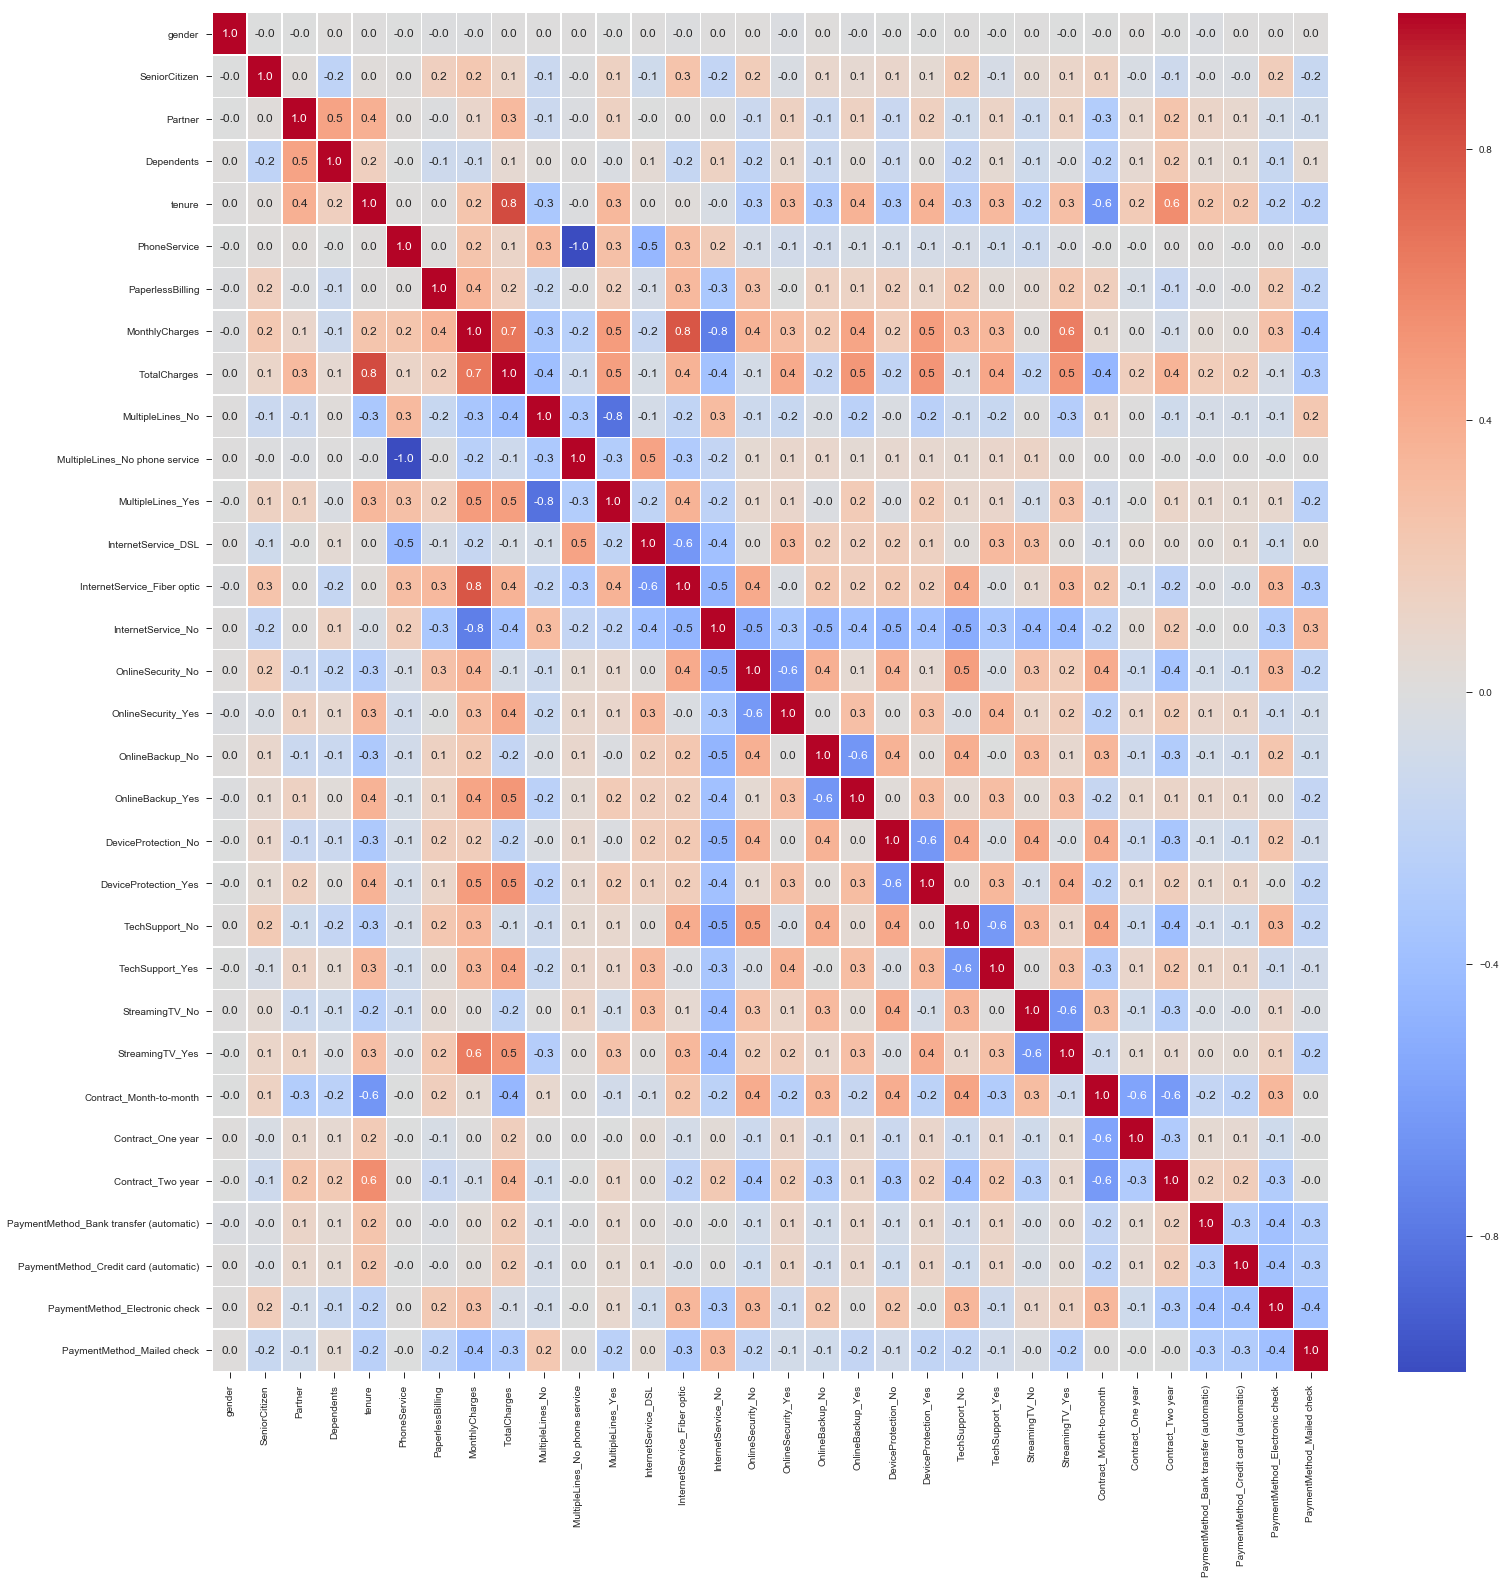

In [38]:
#correlation map
f,ax = plt.subplots(figsize=(25,25))
sns.heatmap(x_1.corr(), annot=True, cmap = 'coolwarm', linewidths=.5, fmt= '.1f',ax=ax)

Accuracy is:  0.7891737891737892


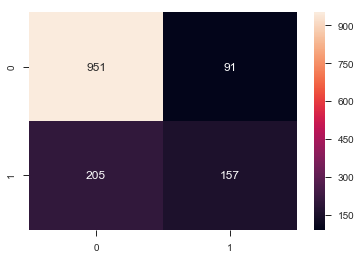

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 80 % and test 20 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.2, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

y_pred = clf_rf.predict(x_test)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

         No       0.82      0.91      0.87      1042
        Yes       0.63      0.43      0.51       362

avg / total       0.77      0.79      0.77      1404



In [43]:
from sklearn import linear_model as lm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.naive_bayes import GaussianNB as gnb

Accuracy is:  0.7450142450142451


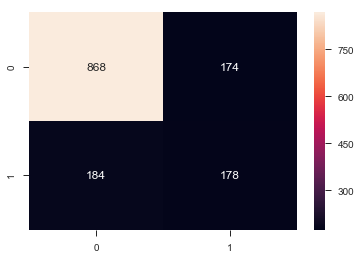

In [55]:
#Decision Tree classifier 
clf_dtc = dtc()      
clr_dtc = clf_dtc.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_dtc.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_dtc.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

y_pred = clf_dtc.predict(x_test)

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

         No       0.83      0.83      0.83      1042
        Yes       0.51      0.49      0.50       362

avg / total       0.74      0.75      0.74      1404



Accuracy is:  0.782051282051282


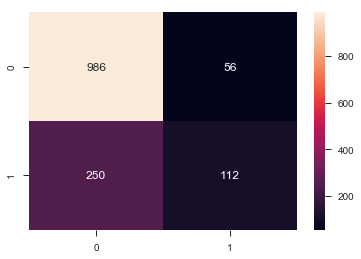

In [57]:
clf_SVC = SVC()      
clr_SVC = clf_SVC.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_SVC.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_SVC.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

y_pred = clf_SVC.predict(x_test)

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

         No       0.80      0.95      0.87      1042
        Yes       0.67      0.31      0.42       362

avg / total       0.76      0.78      0.75      1404



Accuracy is:  0.801994301994302


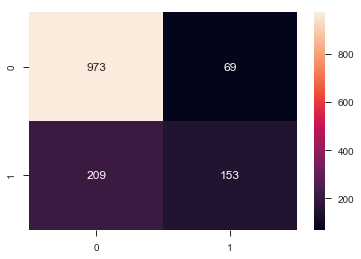

In [59]:
clf_SVC = SVC(kernel='linear')      
clr_SVC = clf_SVC.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_SVC.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_SVC.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

y_pred = clf_SVC.predict(x_test)

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))



             precision    recall  f1-score   support

         No       0.82      0.93      0.88      1042
        Yes       0.69      0.42      0.52       362

avg / total       0.79      0.80      0.78      1404



Accuracy is:  0.7564102564102564


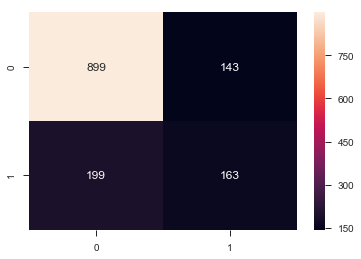

In [65]:
clf_knnc = knnc()      
clr_knnc = clf_knnc.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_knnc.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_knnc.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

y_pred = clf_knnc.predict(x_test)

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


             precision    recall  f1-score   support

         No       0.82      0.86      0.84      1042
        Yes       0.53      0.45      0.49       362

avg / total       0.74      0.76      0.75      1404



Accuracy is:  0.7435897435897436


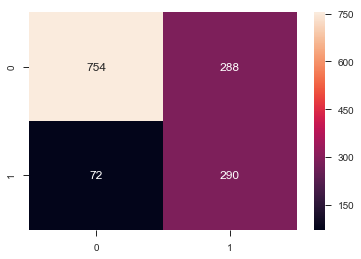

In [67]:
clf_gnb = gnb()      
clr_gnb = clf_gnb.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_gnb.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_gnb.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")
y_pred = clf_gnb.predict(x_test)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

         No       0.91      0.72      0.81      1042
        Yes       0.50      0.80      0.62       362

avg / total       0.81      0.74      0.76      1404



Accuracy is:  0.8198005698005698
__________________________________________________________
             precision    recall  f1-score   support

         No       0.86      0.91      0.88      1042
        Yes       0.68      0.57      0.62       362

avg / total       0.81      0.82      0.81      1404



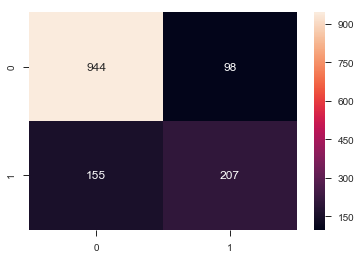

In [71]:
from sklearn.linear_model import LogisticRegression

clf_LogisticRegression = LogisticRegression()      
clr_LogisticRegression = clf_LogisticRegression.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_LogisticRegression.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_LogisticRegression.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

y_pred = clf_LogisticRegression.predict(x_test)

print('__________________________________________________________')

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [124]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=23).fit(x_train, y_train)

In [125]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [7.28489131e-02 1.13909739e+02 5.74494589e+01 1.08394097e+02
 1.29219092e+04 1.61735712e-01 7.95924908e+01 2.82427751e+03
 4.93798871e+05 2.83557662e+00 1.48018886e+00 5.72205827e+00
 5.19644238e+01 2.82284584e+02 2.22669371e+02 3.33684844e+02
 1.25896642e+02 2.24136806e+02 2.41961014e+01 1.93840917e+02
 1.49209134e+01 3.08997650e+02 1.02277725e+02 6.50310324e+01
 8.93961099e+00 4.07353771e+02 1.40038402e+02 3.90448697e+02
 5.51313877e+01 8.31645055e+01 3.20147914e+02 3.19421595e+01]
Feature list: Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No',

Accuracy is:  0.7991452991452992
             precision    recall  f1-score   support

         No       0.83      0.91      0.87      1042
        Yes       0.65      0.47      0.55       362

avg / total       0.79      0.80      0.79      1404



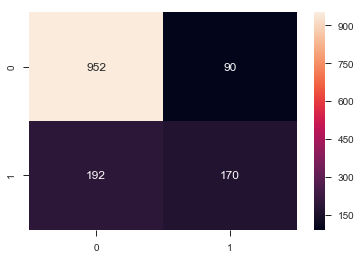

In [126]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

y_pred = clf_rf_2.predict(x_test_2)


print(classification_report(y_test,y_pred))

ValueError: Data is not binary and pos_label is not specified

Accuracy is:  0.74002849002849
             precision    recall  f1-score   support

         No       0.83      0.82      0.82      1042
        Yes       0.50      0.50      0.50       362

avg / total       0.74      0.74      0.74      1404



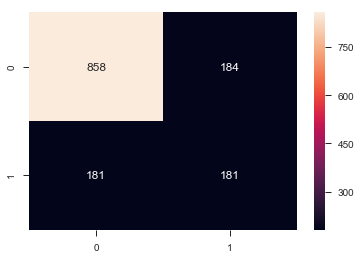

In [127]:
#Decision Tree classifier 
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_dtc_2 = dtc()      
clr_dtc_2 = clf_dtc_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_dtc_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_dtc_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

y_pred = clf_dtc_2.predict(x_test_2)

print(classification_report(y_test,y_pred))




Accuracy is:  0.8169515669515669
             precision    recall  f1-score   support

         No       0.86      0.90      0.88      1042
        Yes       0.67      0.57      0.61       362

avg / total       0.81      0.82      0.81      1404



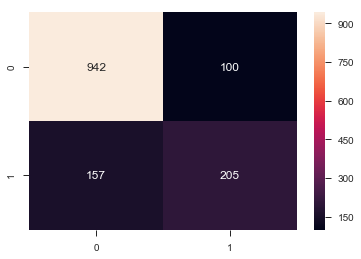

In [128]:
#Decision Tree classifier 
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_LogisticRegression_2 = LogisticRegression()      
clr_LogisticRegression_2 = clf_LogisticRegression_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_LogisticRegression_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_LogisticRegression_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

y_pred = clf_LogisticRegression_2.predict(x_test_2)

print(classification_report(y_test,y_pred))

In [129]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_LogisticRegression_3 = LogisticRegression()      
rfe = RFE(estimator=clf_LogisticRegression_3, n_features_to_select=23, step=1)
rfe = rfe.fit(x_train, y_train)

In [130]:
print('Chosen best 23 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 23 feature by rfe: Index(['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'MultipleLines_No phone service',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [131]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_LogisticRegression_4 = LogisticRegression() 
rfecv = RFECV(estimator=clf_LogisticRegression_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 32
Best features : Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


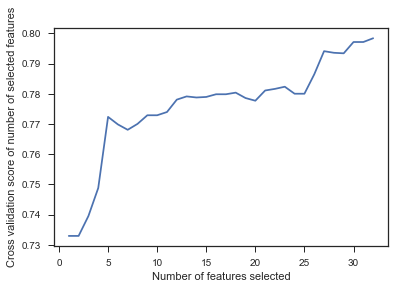

In [153]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Feature ranking:
1. feature 8 (0.169213)
2. feature 4 (0.154134)
3. feature 7 (0.153126)
4. feature 36 (0.042698)
5. feature 24 (0.037510)
6. feature 38 (0.033192)
7. feature 15 (0.029578)
8. feature 0 (0.026025)
9. feature 6 (0.024666)
10. feature 41 (0.022506)
11. feature 2 (0.021674)
12. feature 13 (0.018997)
13. feature 3 (0.017982)
14. feature 1 (0.017981)
15. feature 37 (0.016791)
16. feature 17 (0.014589)
17. feature 11 (0.013527)
18. feature 39 (0.012921)
19. feature 42 (0.012898)
20. feature 9 (0.012451)
21. feature 21 (0.012415)
22. feature 40 (0.012044)
23. feature 18 (0.011938)
24. feature 23 (0.011333)
25. feature 12 (0.010807)
26. feature 20 (0.010787)
27. feature 27 (0.010667)
28. feature 26 (0.010097)
29. feature 29 (0.009958)
30. feature 35 (0.006684)
31. feature 22 (0.006480)
32. feature 32 (0.006326)
33. feature 30 (0.005508)
34. feature 25 (0.005251)
35. feature 33 (0.004492)
36. feature 10 (0.004326)
37. feature 14 (0.003754)
38. feature 5 (0.003099)
39. feature 16

IndexError: index 36 is out of bounds for axis 1 with size 32

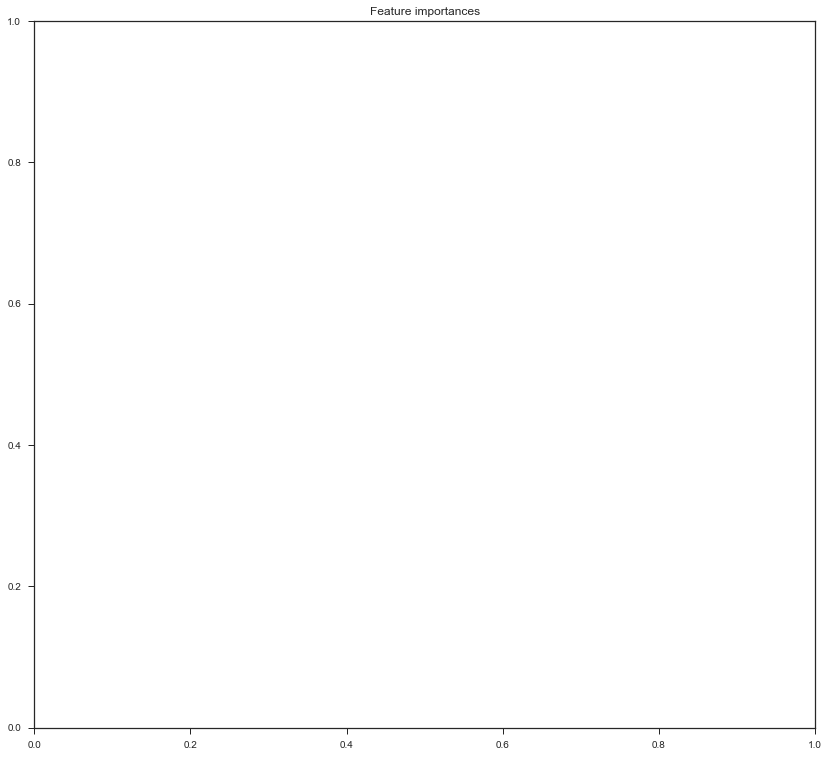

In [144]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()